Import Lyrics

In [1]:
import pandas as pd

new_lyrics = pd.read_csv('../temp/phrase_fix_1.csv', index_col=0)['0'].to_list()


Calculate line length

In [2]:
end = {'endofline', 'endofparagraph'}
past_lengths = [] # number of tokens per line
past_song_lengths = [] # number of lines needed
current_length = 0
song_length = 0
for song in new_lyrics:
    for word in song.split(' '):
        if word in end: 
            past_lengths.append(current_length)
            current_length = 0
            song_length += 1
        else: current_length+=1
    past_song_lengths.append(song_length)
    song_length = 0

Plot line length

Number of tokens per line


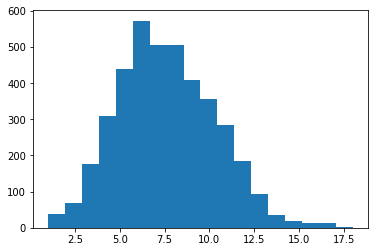

Number of lines per song


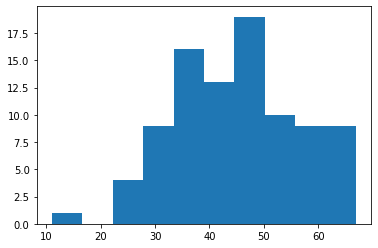

------------------------------------------


In [3]:
import matplotlib.pyplot as plt
print('Number of tokens per line')
bins=18
plt.hist(past_lengths, bins=bins)
plt.show()

print('Number of lines per song')
bins=10
plt.hist(past_song_lengths, bins=bins)
plt.show()
print('------------------------------------------')

Fit normal curve to line lengths

Fit normal to number of tokens per line


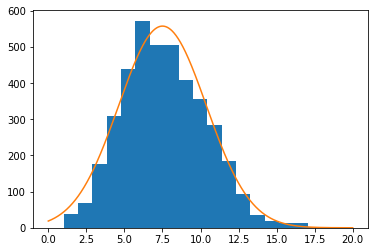

Mu: 7.50
Sigma: 2.88
Fit normal to number of lines per song


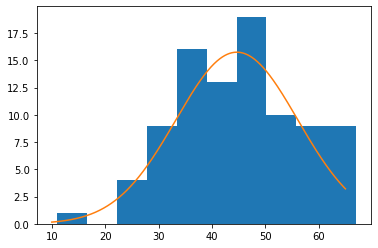

Mu: 44.66
Sigma: 11.40


In [4]:
# https://www.kite.com/python/answers/how-to-fit-a-distribution-to-a-histogram-in-python
from scipy import stats
import numpy as np

print('Fit normal to number of tokens per line')
bins = 18
x_axis = np.arange(0, 20, 0.01)

mu, sigma = stats.norm.fit(past_lengths)
best_fit_line = stats.norm.pdf(x_axis, mu, sigma)*len(past_lengths)

plt.hist(past_lengths, bins=bins)
plt.plot(x_axis, best_fit_line)
plt.show()
print(f'Mu: {mu:.2f}')
print(f'Sigma: {sigma:.2f}')


print('Fit normal to number of lines per song')
bins=10
x_axis = np.arange(10, 65, 0.01)

mu, sigma = stats.norm.fit(past_song_lengths)
# add in a fudge factor of 5 for graphing to make it pretty
best_fit_line = stats.norm.pdf(x_axis, mu, sigma)*len(past_song_lengths)*5 

plt.hist(past_song_lengths, bins=bins)
plt.plot(x_axis, best_fit_line)
plt.show()
print(f'Mu: {mu:.2f}')
print(f'Sigma: {sigma:.2f}')

Takeaways:  
words_per_line~N( 7.50, (2.88)^2)  
lines_per_song~N(44.66, (11.40)^2)